# Example usage of Genetic Algorithm for optimization

### Load data and import everything needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data_dict = fetch_california_housing()
data = data_dict["data"]
features = data_dict["feature_names"]
target = data_dict["target"]
print(data_dict["DESCR"]);

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
TARGET = "median_house_value"
df = pd.DataFrame(data, columns=features)
df[TARGET] = target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


split data in train, dev, test data

In [4]:
train_size = 0.6
dev_size = 0.2
test_size = 1.0 - train_size - dev_size

X = df.drop(columns=TARGET)
y = df[TARGET]

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=(dev_size+test_size), shuffle=False)
X_dev, X_test, y_dev, y_test = train_test_split(X_, y_, test_size=test_size, shuffle=False)

### Use Genetic Algorithm for optimization

In [5]:
from genetic_algorithm import GA, get_random

class House_Value_Regression_GA(GA):

    def calculate_fitness(self, kwargs, params):
        # train model
        model = RandomForestRegressor(n_estimators=params["n_estimators"], criterion=params["criterion"], max_depth=params["max_depth"],
                                        max_features=params["max_features"], bootstrap=params["bootstrap"])
        model = model.fit(kwargs["X_train"], kwargs["y_train"])

        # predict
        y_pred = model.predict(kwargs["X_test"])

        # calc loss
        y_true = np.array(kwargs["y_test"])
        y_pred = np.array(y_pred)
        return - np.mean(np.abs(y_true - y_pred))

    def get_random_param_value(self, param_key):
        if param_key == "n_estimators":
            return get_random(10, 100)
        elif param_key == "criterion":
            return get_random(["squared_error", "friedman_mse"])
        elif param_key == "max_depth":
            if get_random() > 0.3:
                return get_random(20, 300)
            else:
                return None
        elif param_key == "max_features":
            if get_random() > 0.5:
                return get_random(["sqrt", "log2", None])
            else:
                return get_random(0.0, 1.0)
        elif param_key == "bootstrap":
            return get_random([True, False])

parameters = ["n_estimators", "criterion", "max_depth", "max_features", "bootstrap"]

In [6]:
optimizer = House_Value_Regression_GA(generations=10, population_size=15, mutation_rate=0.3, list_of_params=parameters)
optimizer.optimize(X_train=X_train, y_train=y_train, X_test=X_dev, y_test=y_dev)

Hyperparameter Optimization with Genetic Algorithm
    - start: 2024-01-17 16:47 OClock        
    - generations: 10
    - population size: 15
    - mutation rate: 0.3


################
 1. Generation (1/10)
    -> 2024-01-17 16:47 OClock
    -> init new population... (2024-01-17 16:47 OClock)
    -> parallel calc of all individuals fitness... (2024-01-17 16:47 OClock)


    -> select best individuals... (2024-01-17 16:47 OClock)
    -> making gene crossovers... (2024-01-17 16:47 OClock)
    -> making mutations... (2024-01-17 16:47 OClock)
    -> create new individuals... (2024-01-17 16:47 OClock)
Best Fitness: -0.5332720877965201
With Params: {'n_estimators': 73, 'criterion': 'friedman_mse', 'max_depth': 131, 'max_features': 0.7395127827461406, 'bootstrap': True}

Generation-Duration:0D 0H 0M 12S
Total-Duration:0D 0H 0M 12S


################
 2. Generation (2/10)
    -> 2024-01-17 16:47 OClock
    -> parallel calc of all individuals fitness... (2024-01-17 16:47 OClock)
    -> select best individuals... (2024-01-17 16:48 OClock)
    -> making gene crossovers... (2024-01-17 16:48 OClock)
    -> making mutations... (2024-01-17 16:48 OClock)
    -> create new individuals... (2024-01-17 16:48 OClock)
Best Fitness: -0.532501893893508
With Params: {'n_estimators': 22, 'criterion': 'friedman_mse', 'max_depth': 75, 'max_features': 0.6623337445028493, 'bootstr

({'n_estimators': 62,
  'criterion': 'friedman_mse',
  'max_depth': 275,
  'max_features': 0.94536237327589,
  'bootstrap': True},
 -0.5198212899562338,
 "Hyperparameter Optimization with Genetic Algorithm\n    - start: 2024-01-17 16:47 OClock        \n    - generations: 10\n    - population size: 15\n    - mutation rate: 0.3\n\n\n\n################\n 1. Generation (1/10)\n    -> 2024-01-17 16:47 OClock\n    -> init new population... (2024-01-17 16:47 OClock)\n    -> parallel calc of all individuals fitness... (2024-01-17 16:47 OClock)\n    -> select best individuals... (2024-01-17 16:47 OClock)\n    -> making gene crossovers... (2024-01-17 16:47 OClock)\n    -> making mutations... (2024-01-17 16:47 OClock)\n    -> create new individuals... (2024-01-17 16:47 OClock)\n\nBest Fitness: -0.5332720877965201\nWith Params: {'n_estimators': 73, 'criterion': 'friedman_mse', 'max_depth': 131, 'max_features': 0.7395127827461406, 'bootstrap': True}\n\nGeneration-Duration:0D 0H 0M 12S\nTotal-Durati

### Evaluation

In [7]:
model = RandomForestRegressor(n_estimators=62, criterion='friedman_mse', max_depth=275,
                                        max_features=0.94536237327589, bootstrap=True)
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_true = np.array(y_test)
y_pred = np.array(y_pred)
mae = np.mean(np.abs(y_true - y_pred))
mae

0.33821892779036167

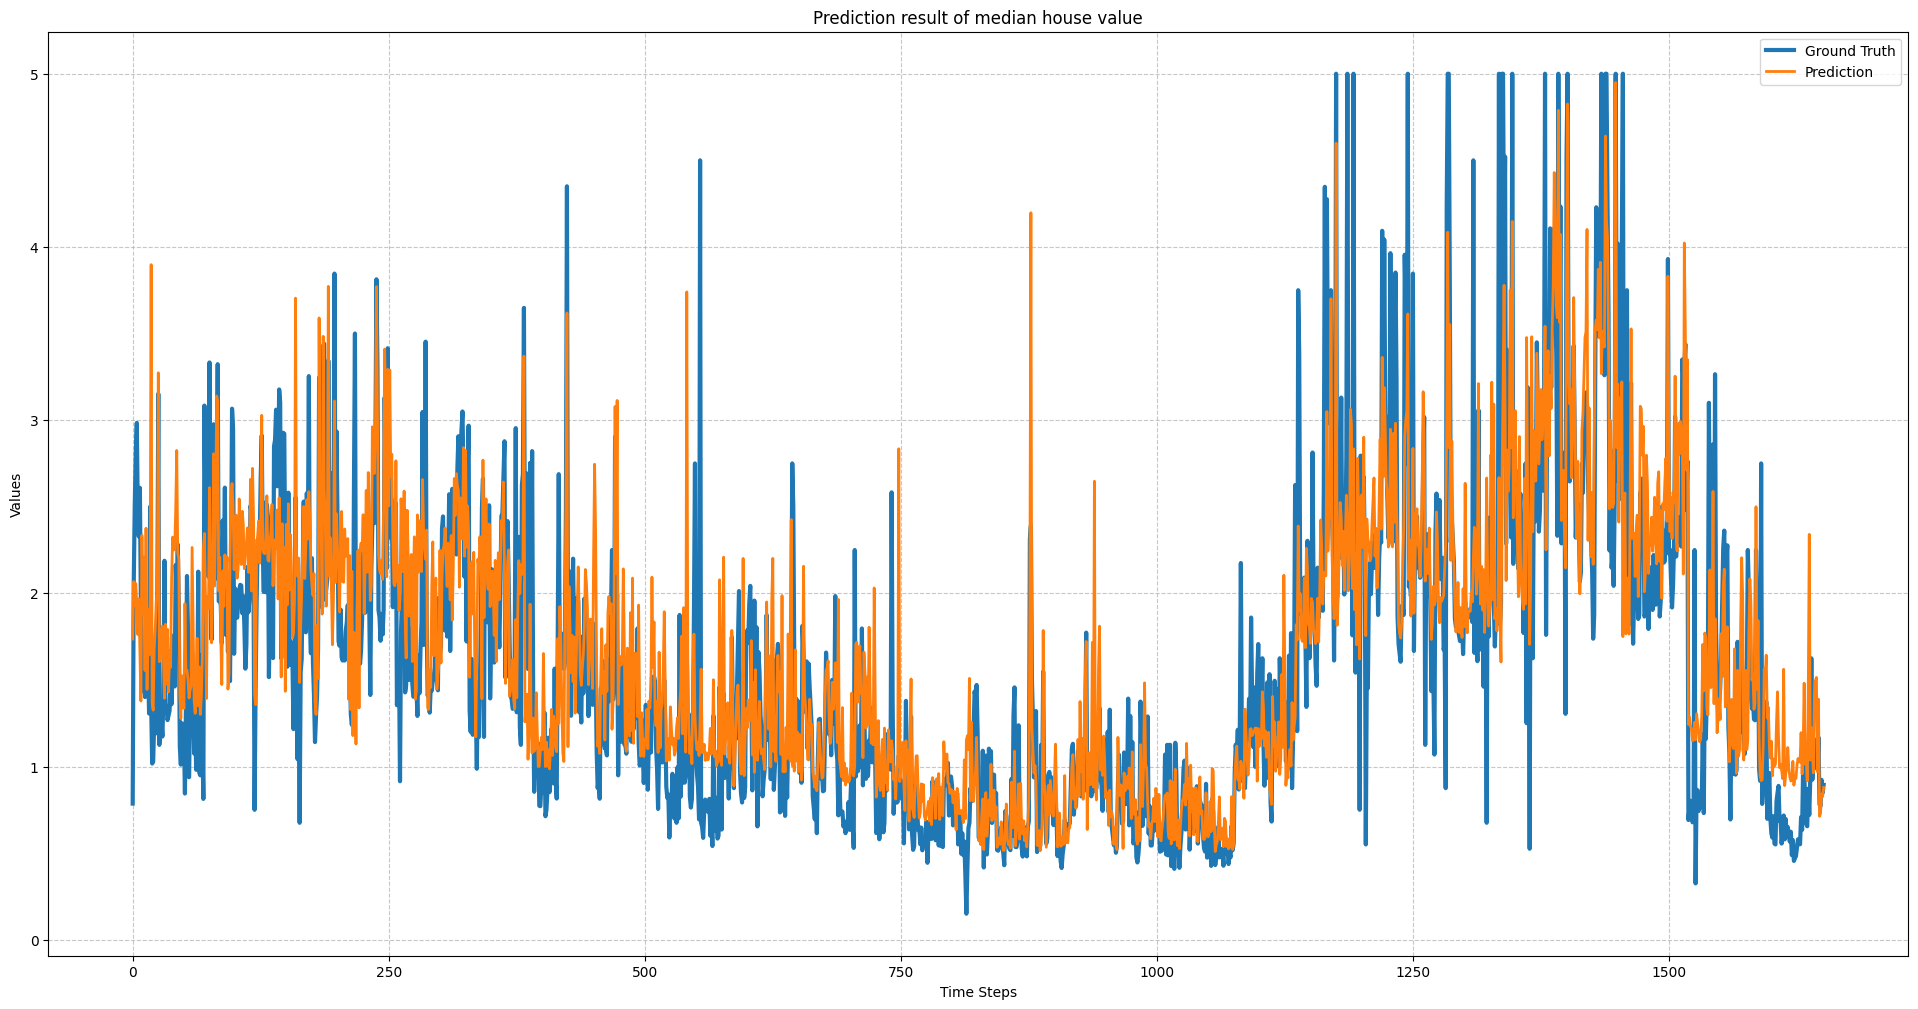

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(24, 12))
ax.plot(np.arange(len(y_test.index)), y_test, label='Ground Truth', linewidth=3)
ax.plot(np.arange(len(y_pred)), y_pred, label='Prediction', linewidth=2)
ax.set_xlabel('Time Steps')
ax.set_ylabel('Values')
ax.set_title(f'Prediction result of median house value')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
plt.show();

---